# Case 2: Pneumonia X-ray image analysis
Neural Networks for Health Technology Applications, Spring 2020 <br>
Team members:
    1. Bellarina Chew
    2. Nik Adam Nik Joharris
    3. Valentin Dassin
Team 16    
Last modified: 01.03.2020<br>
[Helsinki Metropolia University of Applied Sciences](http://www.metropolia.fi/en/)<br>

## Background: Model n°2
The main objective of this Notebook was to add a more complex netwok of dense layer inside of the model n°1 witch was working quite well thanks to the idea of the dropout layer.
So in this Notebook, we gonna add 2 dense layers (one of 128 and an other of 32) to check if the data is not shrinked after the dense layer of 512 neurons and the sigmoid of 1 neuron.

In [1]:
%pylab inline
import time
import shutil
import random
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import Accuracy, FalseNegatives, FalsePositives
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
print('Tensorflow version = ',  tf.__version__)

Populating the interactive namespace from numpy and matplotlib
Tensorflow version =  2.0.0


In [2]:
import os
train_dir = "/Users/User/Desktop/Boulot/DUETI/S2/1rst part/neural/ChestXRay2017/chest_xray/train"

os.listdir(train_dir)

['.DS_Store', 'NORMAL', 'PNEUMONIA']

In [3]:
# All images will be rescaled to 1./255
# The data is split to training and validation sets
# Training = 70%
# Validation = 30%
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

train_generator = train_datagen.flow_from_directory(
    # This is the target directory
    train_dir, 
    
    # All images will be resizd to 200x200
    target_size=(150, 150),
    
    # We read the images in batches
    batch_size=16,

    # Create binary labels
    class_mode='binary',

    # This will be the training set
    subset="training")

# Create the same thing for validation set
valid_generator = train_datagen.flow_from_directory(
    # This is the target directory
    train_dir, 
    
    # All images will be resizd to 200x200
    target_size=(150, 150),
    
    # We read the images in batches
    batch_size=16,

    # Create binary labels
    class_mode='binary',

    # This will be the validation set
    subset="validation",

    #shuffle has to false
    shuffle = False)

train_generator.class_indices

Found 3664 images belonging to 2 classes.
Found 1568 images belonging to 2 classes.


{'NORMAL': 0, 'PNEUMONIA': 1}

In [4]:
# test that train generator works 
# labels_batch place labels automatically for whichever folder comes first alphabetically;
# this will be labelled 0. 
# e.g. normal = 0 , pneumonia = 1
i = 0
for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    i = i+1
    if i > 5:
        break

data batch shape:  (16, 150, 150, 3)
labels batch shape:  (16,)
data batch shape:  (16, 150, 150, 3)
labels batch shape:  (16,)
data batch shape:  (16, 150, 150, 3)
labels batch shape:  (16,)
data batch shape:  (16, 150, 150, 3)
labels batch shape:  (16,)
data batch shape:  (16, 150, 150, 3)
labels batch shape:  (16,)
data batch shape:  (16, 150, 150, 3)
labels batch shape:  (16,)


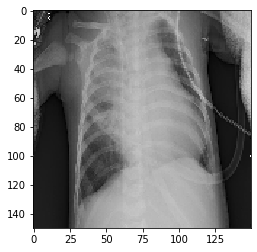

In [5]:
imshow(data_batch[0])
show()

In [6]:
#For this model, we still keep the droupout layers and all the others concolutional layers but we are adding some dense layers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 32)        9

In [7]:
# Use different set of metrics 
my_metrics = ['acc', FalseNegatives(), FalsePositives()]

#To reduce the CPU running time, we increase a bit the learning rate
model.compile(loss = 'binary_crossentropy', 
              optimizer = optimizers.RMSprop(lr = 3.0e-4), 
              metrics = my_metrics)

In [8]:
# Start the clock
t_start = time.time()

print('Training...', end='')
h = model.fit_generator(
    train_generator,
    steps_per_epoch=None,
    verbose=1,
    epochs=4,
    validation_data=valid_generator,
    validation_steps=None)

# Cehcl the time and calculate the elapsed time and time per epoch
t_end = time.time()
t_elapsed = t_end - t_start
t_per_epoch = t_elapsed/3

print('Done')
print(f'Time elapsed = {t_elapsed:.0f} seconds')
print(f'Time per epoch = {t_per_epoch:.2f} seconds')

Training...Epoch 1/4
229/229 [==============================] - 394s 2s/step - loss: 0.3901 - acc: 0.8302 - false_negatives: 121.0000 - false_positives: 501.0000 - val_loss: 0.3758 - val_acc: 0.8527 - val_false_negatives: 8.0000 - val_false_positives: 223.0000
Epoch 2/4
229/229 [==============================] - 387s 2s/step - loss: 0.2114 - acc: 0.9165 - false_negatives: 149.0000 - false_positives: 157.0000 - val_loss: 0.1758 - val_acc: 0.9311 - val_false_negatives: 80.0000 - val_false_positives: 28.0000
Epoch 3/4
229/229 [==============================] - 383s 2s/step - loss: 0.1743 - acc: 0.9378 - false_negatives: 106.0000 - false_positives: 122.0000 - val_loss: 0.1729 - val_acc: 0.9381 - val_false_negatives: 71.0000 - val_false_positives: 26.0000
Epoch 4/4
229/229 [==============================] - 386s 2s/step - loss: 0.1515 - acc: 0.9468 - false_negatives: 92.0000 - false_positives: 103.0000 - val_loss: 0.1148 - val_acc: 0.9566 - val_false_negatives: 43.0000 - val_false_positives

In [9]:
h.history

{'loss': [0.3900912394299778,
  0.2113862160235383,
  0.17429253915284137,
  0.15150061155177294],
 'acc': [0.8302402, 0.9164847, 0.9377729, 0.9467795],
 'false_negatives': [121.0, 149.0, 106.0, 92.0],
 'false_positives': [501.0, 157.0, 122.0, 103.0],
 'val_loss': [0.37577137566404417,
  0.17575164179184607,
  0.1728994165148054,
  0.1147597223372978],
 'val_acc': [0.8526786, 0.9311224, 0.93813777, 0.9566327],
 'val_false_negatives': [8.0, 80.0, 71.0, 43.0],
 'val_false_positives': [223.0, 28.0, 26.0, 25.0]}

In [10]:
hh = h.history
acc = hh['acc']
acc_v = hh['val_acc']
fn = hh['false_negatives']
fn_v = hh['val_false_negatives']
fp = hh['false_positives']
fp_v = hh['val_false_positives']
loss = hh['loss']
loss_v = hh['val_loss']
epochs = arange(len(loss)) + 1

show()

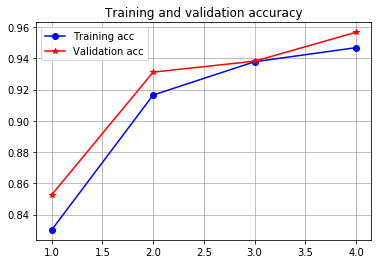

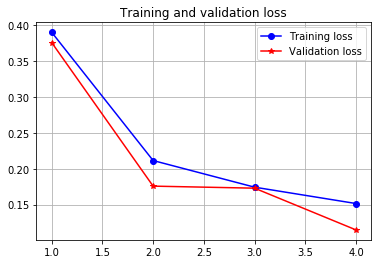

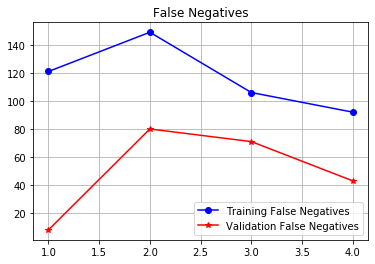

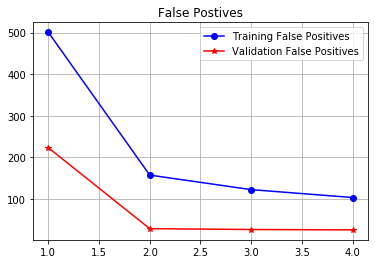

In [11]:
plot(epochs, acc, 'bo-', label='Training acc')
plot(epochs, acc_v, 'r*-', label='Validation acc')
title('Training and validation accuracy')
grid()
legend()

figure()
plot(epochs, loss, 'bo-', label='Training loss')
plot(epochs, loss_v, 'r*-', label='Validation loss')
title('Training and validation loss')
legend()
grid()

figure()
plot(epochs, fn, 'bo-', label='Training False Negatives')
plot(epochs, fn_v, 'r*-', label='Validation False Negatives')
title('False Negatives')
legend()
grid()

figure()
plot(epochs, fp, 'bo-', label='Training False Positives')
plot(epochs, fp_v, 'r*-', label='Validation False Positives')
title('False Postives')
legend()

grid()
show()

In [12]:
labels = valid_generator.classes

predicted = model.predict_generator(valid_generator).flatten()

cm = confusion_matrix(labels, predicted > 0.5)
print(cm)

[[ 379   25]
 [  43 1121]]


In [13]:
# Calculate classification report 
cr = classification_report(labels, predicted > 0.5, target_names=['Normal (0)', 'Pneumonia (1)'])
print(cr)

               precision    recall  f1-score   support

   Normal (0)       0.90      0.94      0.92       404
Pneumonia (1)       0.98      0.96      0.97      1164

     accuracy                           0.96      1568
    macro avg       0.94      0.95      0.94      1568
 weighted avg       0.96      0.96      0.96      1568



In [14]:
#ROC curve analysis
fpr, tpr, thresholds = roc_curve(labels, predicted, pos_label = 1)

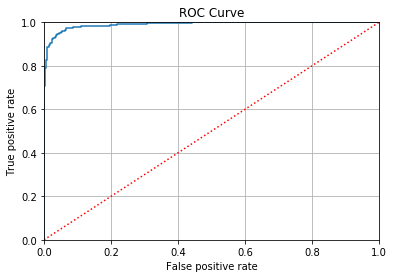

In [15]:
plot(fpr, tpr)
plot([0,1], [0,1], 'r:')
xlabel('False positive rate')
ylabel('True positive rate')
title('ROC Curve')
xlim([0,1])
ylim([0,1])
grid()

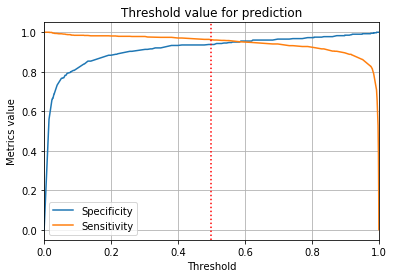

In [16]:
#Find the threshold
plot(thresholds, 1 - fpr, label = 'Specificity')
plot(thresholds, tpr, label = 'Sensitivity')
axvline(0.5, color = 'red', linestyle=':')
xlim([0,1])
title('Threshold value for prediction')
xlabel('Threshold')
ylabel('Metrics value')
legend()
grid()

In [17]:
# Calculate again the classification report with a more optimized theshold determined with the curve
#We choose theshold = 0,2
theshold = 0.2
cr = classification_report(labels, predicted > theshold, target_names=['Normal (0)', 'Pneumonia (1)'])
print(cr)

               precision    recall  f1-score   support

   Normal (0)       0.94      0.89      0.91       404
Pneumonia (1)       0.96      0.98      0.97      1164

     accuracy                           0.96      1568
    macro avg       0.95      0.93      0.94      1568
 weighted avg       0.96      0.96      0.96      1568



# Model 2: Observations
First, we can see that overall, the theshold doesn't change a lot the results we are obtaining.

As we can see it very easelly on the ROC Curve, the results are pretty good with a specificity of 0.94 for a very reasonable training time, there is no overfitting and the false positive score are very low (witch is important for the model to be considered as reliable)

For some reasons, the flatten and dropout layers (automaticly generated) are smallers, so compared to the Model 1 witch contains more than 3 million's parameters we only have less tahan 1 millions, that means that this model is also fater to train and more efficient.